### 데이터 불러오기

In [1]:
import pandas as pd
gyeonggi_df1 = pd.read_csv('../../bigfile/경기_(2024.11월말기준)_전국공장등록현황.csv')
gyeonggi_df63 = pd.read_csv('../../bigfile/경기_(2013.12월말기준)_전국공장등록현황.csv')

C:\Users\32200812\AppData\Local\Temp\ipykernel_24360\3353275431.py:2: DtypeWarning: Columns (12,29) have mixed types. Specify dtype option on import or set low_memory=False.
  gyeonggi_df1 = pd.read_csv('../../bigfile/경기_(2024.11월말기준)_전국공장등록현황.csv')
C:\Users\32200812\AppData\Local\Temp\ipykernel_24360\3353275431.py:3: DtypeWarning: Columns (12,37) have mixed types. Specify dtype option on import or set low_memory=False.
  gyeonggi_df63 = pd.read_csv('../../bigfile/경기_(2013.12월말기준)_전국공장등록현황.csv')


In [2]:
print(gyeonggi_df1.shape, gyeonggi_df63.shape) # (77787, 38) (58434, 38)

(77787, 38) (58434, 38)


## '시군구명'별로 총 공장수 증감 비교
### 2013년 12월 말 vs 2024년 11월 말
### -> 공장 등록현황 어떻게 달라졌는지

In [7]:
# 시군구별 공장 수 요약
gyeonggi_df1_summary = gyeonggi_df1.groupby('시군구명').size().reset_index(name='공장수_2024_11')
gyeonggi_df63_summary = gyeonggi_df63.groupby('시군구명').size().reset_index(name='공장수_2013_12')

# 두 데이터를 시군구명을 기준으로 병합
merged_data = pd.merge(gyeonggi_df1_summary, gyeonggi_df63_summary, on='시군구명', how='outer').fillna(0)

# 공장 수 증감 계산
merged_data['증감'] = merged_data['공장수_2024_11'] - merged_data['공장수_2013_12']

# 증감 값을 기준으로 정렬
merged_data = merged_data.sort_values(by='증감', ascending=False)
merged_data

,시군구명,공장수_2024_11,공장수_2013_12,증감
30,화성시,12793,7772,5021
7,김포시,7936,5061,2875
26,파주시,5121,3612,1509
14,안산시,7502,6038,1464
13,시흥시,6612,5207,1405
17,양주시,2899,1843,1056
22,용인시,2759,1807,952
15,안성시,2295,1709,586
27,평택시,2438,1853,585
10,부천시,3443,2870,573


### 시각화
### 1. 시군구별 증감 데이터 전체 시각화

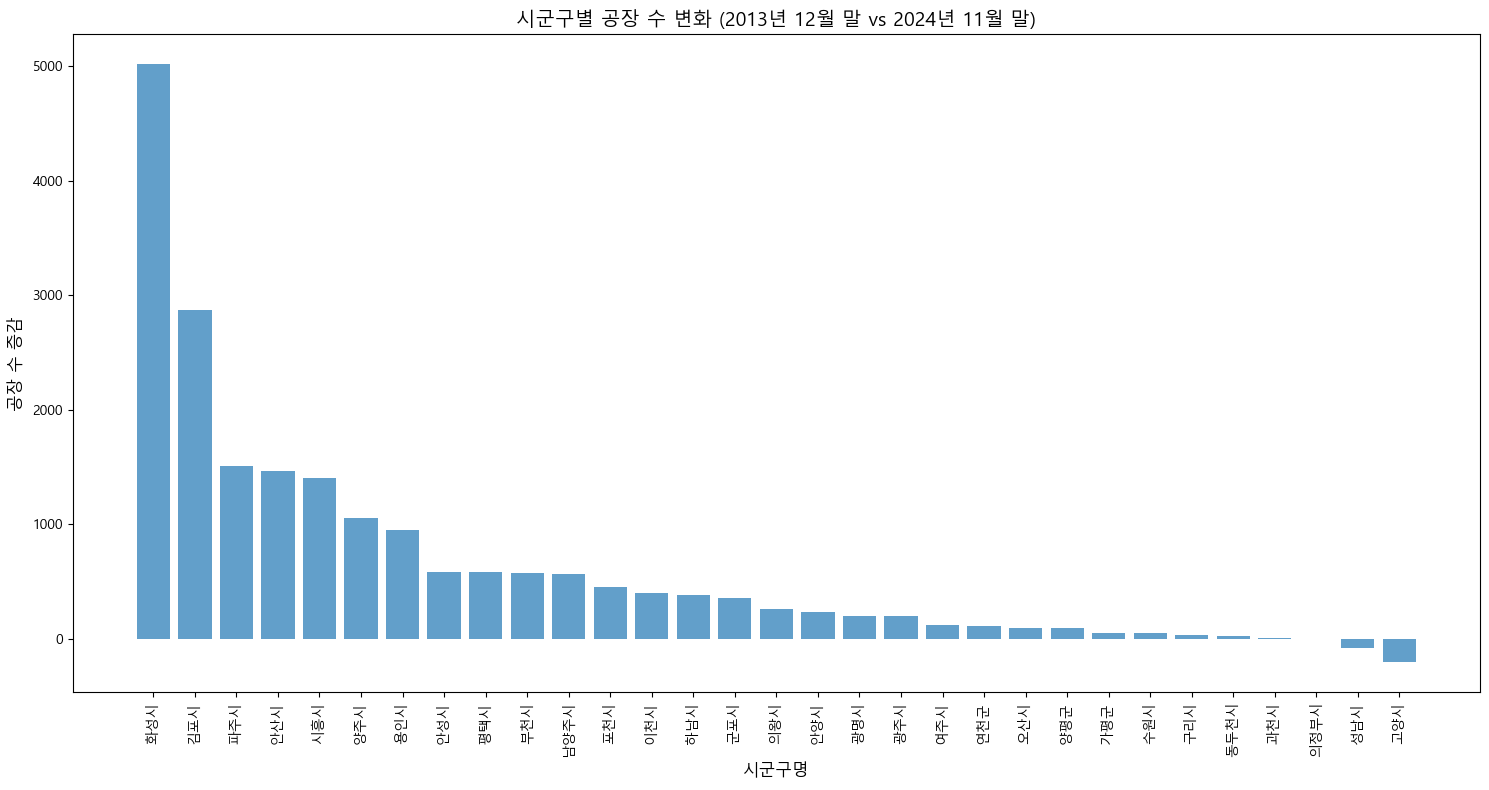

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 8))

# 시군구별 증감 데이터를 전체로 시각화
plt.bar(merged_data['시군구명'], merged_data['증감'], alpha=0.7)
plt.title('시군구별 공장 수 변화 (2013년 12월 말 vs 2024년 11월 말)', fontsize=14)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('공장 수 증감', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

### 2. 시군구별 증감 데이터 상위 10개 지역만 시각화

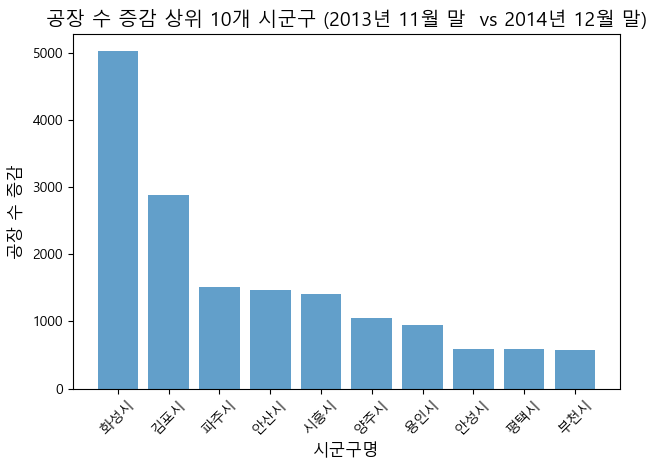

In [11]:
# 상위 10개 시군구만 시각화
top_10_changes = merged_data.nlargest(10, '증감')

plt.bar(top_10_changes['시군구명'], top_10_changes['증감'], alpha=0.7)
plt.title('공장 수 증감 상위 10개 시군구 (2013년 11월 말  vs 2014년 12월 말)', fontsize=14)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('공장 수 증감', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### 설립구분, 보유구분 분포가 이전에 비해 어떻게 달라졌는지 비교

### 1. 설립구분

In [15]:
gyeonggi_df63['설립구분'].unique()

# 2024년 11월 말 기준 도시첨단산업단지 new!
# 기존: ['일반', '일반산업단지', '지식산업센터', '창업', '국가산업단지', '자유무역지역', '외국인기업전용단지','농공단지']

array(['일반', '일반산업단지', '지식산업센터', '창업', '국가산업단지', '자유무역지역', '외국인기업전용단지',
       '농공단지'], dtype=object)

In [21]:
# 2024년과 2013년 설립구분의 차이를 확인
establishment_2024_11_set = set(gyeonggi_df1['설립구분'].unique())
establishment_2013_12_set = set(gyeonggi_df63['설립구분'].unique())

# 2024년에 새롭게 추가된 설립구분
new_establishment = establishment_2024_11_set - establishment_2013_12_set

# 데이터프레임에서 도시첨단산업단지의 공장 수 확인
new_establishment_data = gyeonggi_df1[gyeonggi_df1['설립구분'].isin(new_establishment)]['설립구분'].value_counts()
new_establishment_data

설립구분
도시첨단산업단지    340
              3
외국인투자지역       1
Name: count, dtype: int64

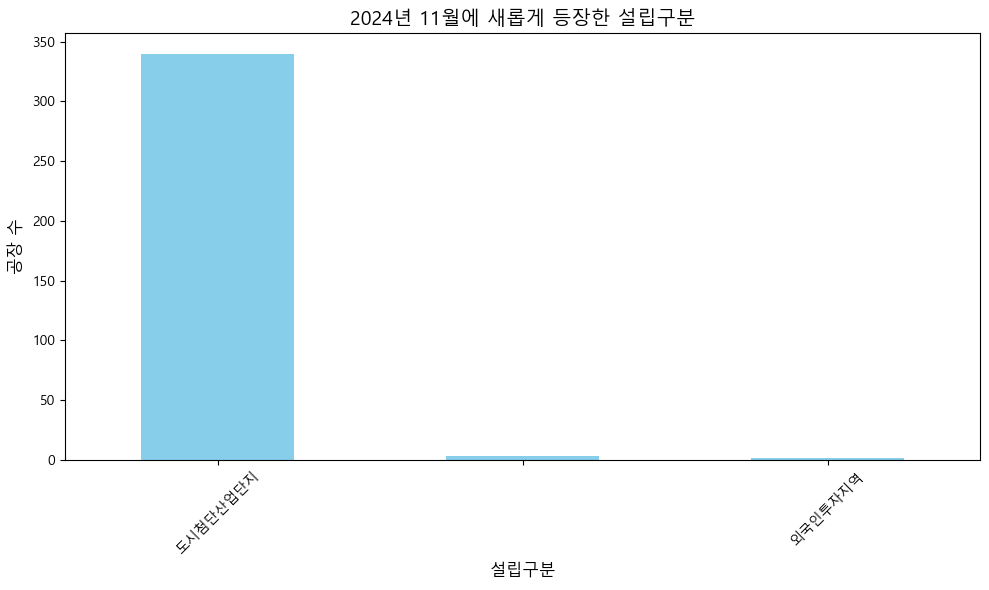

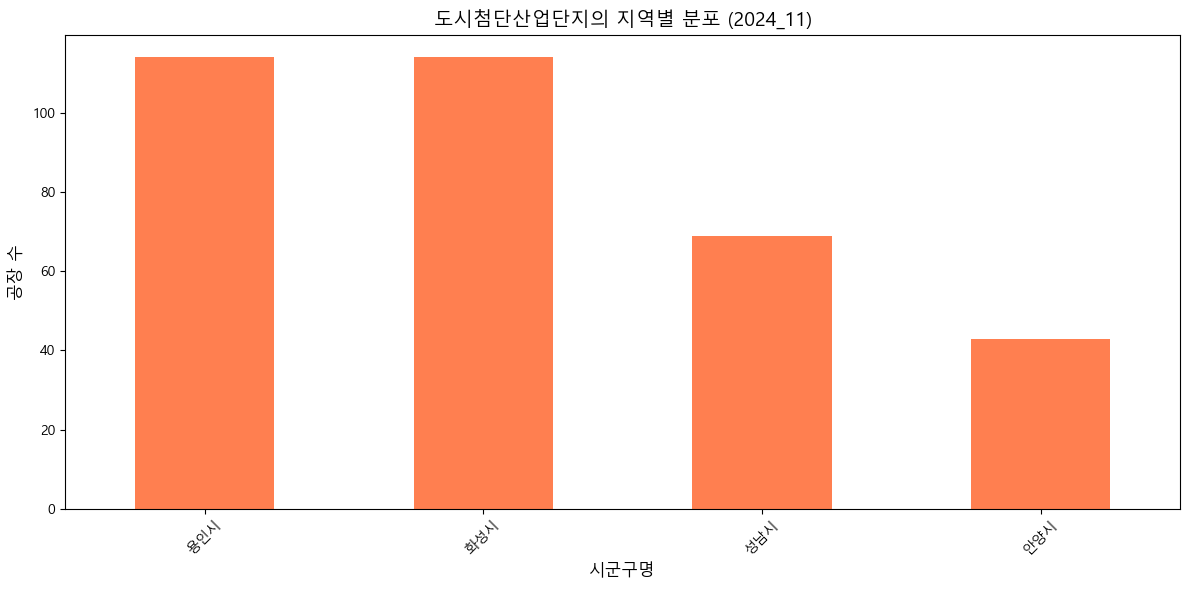

In [22]:
import matplotlib.pyplot as plt

# 시각화: 2024년에 새롭게 등장한 설립구분
plt.figure(figsize=(10, 6))
new_establishment_data.plot(kind='bar', color='skyblue')
plt.title('2024년 11월에 새롭게 등장한 설립구분', fontsize=14)
plt.xlabel('설립구분', fontsize=12)
plt.ylabel('공장 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 추가 분석: 도시첨단산업단지의 지역별 분포
urban_high_tech = gyeonggi_df1[gyeonggi_df1['설립구분'] == '도시첨단산업단지']
urban_high_tech_by_region = urban_high_tech['시군구명'].value_counts()

# 도시첨단산업단지의 지역별 분포를 시각화
plt.figure(figsize=(12, 6))
urban_high_tech_by_region.plot(kind='bar', color='coral')
plt.title('도시첨단산업단지의 지역별 분포 (2024_11)', fontsize=14)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('공장 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. 보유구분

In [55]:
# 보유구분에 대한 값의 분포를 비교하기 위한 코드

# 2024년 데이터의 보유구분 값 분포
ownership_type_2024_11 = gyeonggi_df1['보유구분'].value_counts()

# 2013년 데이터의 보유구분 값 분포
ownership_type_2013_12 = gyeonggi_df63['보유구분'].value_counts()

# 두 데이터 병합
ownership_comparison = pd.concat([ownership_type_2013_12, ownership_type_2024_11], axis=1, keys=['2024년 11월 말 보유구분', '2013년 12월 말 보유구분']).fillna(0)
ownership_comparison

,2024년 11월 말 보유구분,2013년 12월 말 보유구분
보유구분,,
자가,34438.0,46149
임대,23996.0,31635
,0.0,3


In [28]:
# print(gyeonggi_df1['보유구분'].unique(), gyeonggi_df63['보유구분'].unique()) # 임대/자가


['임대' '자가' ' '] ['자가' '임대']


### 시군별 대표업종이 이전에 비해 어떻게 다른지

In [53]:
### 최종 수정중
# 2024년과 2013년 데이터에서 시군구명별 대표업종 추출
top_industry_2024_11 = gyeonggi_df1.groupby('시군구명')['대표업종'].agg(lambda x: x.value_counts().idxmax())
top_industry_2013_12 = gyeonggi_df63.groupby('시군구명')['대표업종'].agg(lambda x: x.value_counts().idxmax())

# 대표업종 데이터 병합
top_industry_comparison = pd.concat(
    [top_industry_2024_11, top_industry_2013_12], axis=1, keys=['2024년 11월 말 대표업종', '2013년 12월 말 대표업종']
)

# 업종 코드와 업종명을 매핑하는 데이터 생성 (중복 제거)
industry_code_name_mapping = gyeonggi_df1[['대표업종', '업종명']].drop_duplicates(subset='대표업종').set_index('대표업종')['업종명']

# 2024년과 2013년 대표업종의 업종명 추가
top_industry_comparison['2024년 11월 업종명'] = top_industry_comparison['2024년 11월 말 대표업종'].map(industry_code_name_mapping)
top_industry_comparison['2013년 12월 업종명'] = top_industry_comparison['2013년 12월 말 대표업종'].map(industry_code_name_mapping)
top_industry_comparison

# gyeonggi_df1[gyeonggi_df1['대표업종']=='26299']['업종명'].unique() # 잘 됐는지 확인하는 코드

,2024년 11월 말 대표업종,2013년 12월 말 대표업종,2024년 11월 업종명,2013년 12월 업종명
시군구명,,,,
가평군,16101,16101,일반 제재업,일반 제재업
고양시,18119,18119,기타 인쇄업,기타 인쇄업 외 1 종
과천시,18111,18111,경 인쇄업 외 1 종,경 인쇄업
광명시,28123,28122,배전반 및 전기 자동제어반 제조업,전기회로 접속장치 제조업 외 1 종
광주시,32029,32029,기타 목재가구 제조업,기타 목재가구 제조업
구리시,26429,33910,기타 무선 통신장비 제조업,간판 및 광고물 제조업
군포시,29294,29294,주형 및 금형 제조업,주형 및 금형 제조업
김포시,32029,32029,기타 목재가구 제조업,기타 목재가구 제조업
남양주시,32029,32029,기타 목재가구 제조업,기타 목재가구 제조업
